In [15]:
import torch
import pandas as pd 
import torch.nn as nn

In [23]:
data = pd.read_csv(r"C:\Users\mmuth\Downloads\amazon_sales_dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          50000 non-null  int64  
 1   order_date        50000 non-null  object 
 2   product_id        50000 non-null  int64  
 3   product_category  50000 non-null  object 
 4   price             50000 non-null  float64
 5   discount_percent  50000 non-null  int64  
 6   quantity_sold     50000 non-null  int64  
 7   customer_region   50000 non-null  object 
 8   payment_method    50000 non-null  object 
 9   rating            50000 non-null  float64
 10  review_count      50000 non-null  int64  
 11  discounted_price  50000 non-null  float64
 12  total_revenue     50000 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 5.0+ MB


In [24]:
data

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
0,1,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52
1,2,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40
2,3,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28
3,4,2022-04-17,2522,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64
4,5,2022-03-13,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,2022-09-03,1433,Beauty,26.99,0,5,Middle East,Credit Card,2.4,386,26.99,134.95
49996,49997,2022-07-03,1428,Beauty,294.23,10,5,Asia,Credit Card,3.1,8,264.81,1324.05
49997,49998,2023-02-17,4651,Electronics,352.11,30,4,Asia,Debit Card,3.1,104,246.48,985.92
49998,49999,2022-09-30,4371,Beauty,307.54,5,1,Middle East,UPI,1.8,316,292.16,292.16


In [25]:
from datetime import datetime

data['order_date'] = pd.to_datetime(data['order_date'],format="mixed")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          50000 non-null  int64         
 1   order_date        50000 non-null  datetime64[ns]
 2   product_id        50000 non-null  int64         
 3   product_category  50000 non-null  object        
 4   price             50000 non-null  float64       
 5   discount_percent  50000 non-null  int64         
 6   quantity_sold     50000 non-null  int64         
 7   customer_region   50000 non-null  object        
 8   payment_method    50000 non-null  object        
 9   rating            50000 non-null  float64       
 10  review_count      50000 non-null  int64         
 11  discounted_price  50000 non-null  float64       
 12  total_revenue     50000 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(3)
memory usage: 5.0+ MB


In [26]:
data['Month'] = data['order_date'].dt.month
data['Year'] = data['order_date'].dt.year
data['Day'] = data['order_date'].dt.day

data.drop('order_date',axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          50000 non-null  int64  
 1   product_id        50000 non-null  int64  
 2   product_category  50000 non-null  object 
 3   price             50000 non-null  float64
 4   discount_percent  50000 non-null  int64  
 5   quantity_sold     50000 non-null  int64  
 6   customer_region   50000 non-null  object 
 7   payment_method    50000 non-null  object 
 8   rating            50000 non-null  float64
 9   review_count      50000 non-null  int64  
 10  discounted_price  50000 non-null  float64
 11  total_revenue     50000 non-null  float64
 12  Month             50000 non-null  int32  
 13  Year              50000 non-null  int32  
 14  Day               50000 non-null  int32  
dtypes: float64(4), int32(3), int64(5), object(3)
memory usage: 5.1+ MB


In [27]:
data

,order_id,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue,Month,Year,Day
0,1,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52,4,2022,13
1,2,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40,3,2023,12
2,3,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28,9,2022,28
3,4,2522,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64,4,2022,17
4,5,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72,3,2022,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,1433,Beauty,26.99,0,5,Middle East,Credit Card,2.4,386,26.99,134.95,9,2022,3
49996,49997,1428,Beauty,294.23,10,5,Asia,Credit Card,3.1,8,264.81,1324.05,7,2022,3
49997,49998,4651,Electronics,352.11,30,4,Asia,Debit Card,3.1,104,246.48,985.92,2,2023,17
49998,49999,4371,Beauty,307.54,5,1,Middle East,UPI,1.8,316,292.16,292.16,9,2022,30


In [28]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

data['product_category'] = enc.fit_transform(data['product_category'])
data['customer_region'] = enc.fit_transform(data['customer_region'])
data['payment_method'] = enc.fit_transform(data['payment_method'])


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          50000 non-null  int64  
 1   product_id        50000 non-null  int64  
 2   product_category  50000 non-null  int32  
 3   price             50000 non-null  float64
 4   discount_percent  50000 non-null  int64  
 5   quantity_sold     50000 non-null  int64  
 6   customer_region   50000 non-null  int32  
 7   payment_method    50000 non-null  int32  
 8   rating            50000 non-null  float64
 9   review_count      50000 non-null  int64  
 10  discounted_price  50000 non-null  float64
 11  total_revenue     50000 non-null  float64
 12  Month             50000 non-null  int32  
 13  Year              50000 non-null  int32  
 14  Day               50000 non-null  int32  
dtypes: float64(4), int32(6), int64(5)
memory usage: 4.6 MB


In [30]:
x = data.drop('total_revenue',axis=1)
y = data['total_revenue']

In [31]:
x = torch.tensor(x.values,dtype=torch.float)
y = torch.tensor(y.values,dtype=torch.float)

In [33]:
x = (x-x.mean())/x.std()

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([30000, 14])
torch.Size([20000, 14])
torch.Size([30000])
torch.Size([20000])


In [36]:
class revenue(nn.Module) :
    def __init__(self):
        super(revenue,self).__init__()
        self.layer1 = nn.Linear(14,32)
        self.layer2 = nn.Linear(32,64)
        self.layer3 = nn.Linear(64,32)
        self.layer4 = nn.Linear(32,1)
        self.relu = nn.ReLU()
    def forward(self,x) :
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        return x

In [37]:
from torch.utils.data import TensorDataset,DataLoader

batch_size=20

train_dataset = TensorDataset(x_train,y_train)

train_loader = DataLoader(train_dataset,shuffle=True,batch_size=batch_size)

val_dataset = TensorDataset(x_test,y_test)

val_loader = DataLoader(val_dataset,shuffle=True,batch_size=batch_size)

In [ ]:
import torch.optim as optim
from tqdm import tqdm
from sklearn.metrics import r2_score

model = revenue()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

no_epochs = 20

train_mse_loss = []
val_mse_loss = [] 
train_acc_his = [] 
val_acc_his = []

for epoch in range(no_epochs):
    # ---------- TRAIN ----------
    model.train()
    train_loss = 0.0

    train_preds = []
    train_truths = []

    for x_batch, y_batch in tqdm(train_loader):
        optimizer.zero_grad()

        y_batch = y_batch.float().unsqueeze(1)
        prediction = model(x_batch)

        loss = criterion(prediction, y_batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        train_preds.append(prediction.detach().cpu())
        train_truths.append(y_batch.detach().cpu())

    train_loss /= len(train_loader)

    train_preds = torch.cat(train_preds).numpy().ravel()
    train_truths = torch.cat(train_truths).numpy().ravel()
    train_acc = r2_score(train_truths, train_preds)
    
    # ---------- VALIDATION ----------
    model.eval()   
    val_loss = 0.0

    val_preds = []
    val_truths = []

    with torch.no_grad():
        for x_batch, y_batch in tqdm(val_loader):
            y_batch = y_batch.float().unsqueeze(1)
            prediction = model(x_batch)

            loss = criterion(prediction, y_batch)
            val_loss += loss.item()

            val_preds.append(prediction.detach().cpu())
            val_truths.append(y_batch.detach().cpu())

    val_loss /= len(val_loader)

    val_preds = torch.cat(val_preds).numpy().ravel()
    val_truths = torch.cat(val_truths).numpy().ravel()
    val_acc = r2_score(val_truths, val_preds)
    
    print(
        f"Epoch [{epoch+1}/{no_epochs}] | "
        f"Train Loss: {train_loss:.4f} | "
        f"Val Loss: {val_loss:.4f} | "
        f"Train R2: {train_acc:.4f} | "
        f"Val R2: {val_acc:.4f}"
    )
    val_acc_his.append(val_acc)
    val_mse_loss.append(val_loss)
    train_acc_his.append(train_acc)
    train_mse_loss.append(train_loss)

100%|██████████| 1000/1000 [00:00<00:00, 4522.13it/s]


Epoch [1/20] | Train Loss: 314092.8662 | Val Loss: 281743.0435 | Train R2: -0.1463 | Val R2: -0.0020


100%|██████████| 1000/1000 [00:00<00:00, 4562.94it/s]


Epoch [2/20] | Train Loss: 272762.0221 | Val Loss: 277183.0297 | Train R2: 0.0046 | Val R2: 0.0142


100%|██████████| 1000/1000 [00:00<00:00, 4704.49it/s]


Epoch [3/20] | Train Loss: 266976.0887 | Val Loss: 268507.3596 | Train R2: 0.0257 | Val R2: 0.0451


100%|██████████| 1000/1000 [00:00<00:00, 4248.14it/s]


Epoch [4/20] | Train Loss: 251871.7447 | Val Loss: 240792.0284 | Train R2: 0.0808 | Val R2: 0.1436


100%|██████████| 1000/1000 [00:00<00:00, 4255.42it/s]


Epoch [5/20] | Train Loss: 181061.6846 | Val Loss: 142374.0246 | Train R2: 0.3392 | Val R2: 0.4936


100%|██████████| 1000/1000 [00:00<00:00, 4339.70it/s]


Epoch [6/20] | Train Loss: 133605.3450 | Val Loss: 137665.1988 | Train R2: 0.5124 | Val R2: 0.5104


100%|██████████| 1000/1000 [00:00<00:00, 4286.93it/s]


Epoch [7/20] | Train Loss: 132960.6283 | Val Loss: 140043.7795 | Train R2: 0.5148 | Val R2: 0.5019


100%|██████████| 1000/1000 [00:00<00:00, 4455.45it/s]


Epoch [8/20] | Train Loss: 132658.9575 | Val Loss: 138047.4443 | Train R2: 0.5159 | Val R2: 0.5090


100%|██████████| 1000/1000 [00:00<00:00, 4275.39it/s]


Epoch [9/20] | Train Loss: 132603.9206 | Val Loss: 135157.8171 | Train R2: 0.5161 | Val R2: 0.5193


100%|██████████| 1000/1000 [00:00<00:00, 4421.38it/s]


Epoch [10/20] | Train Loss: 132395.4842 | Val Loss: 134676.1723 | Train R2: 0.5168 | Val R2: 0.5210


100%|██████████| 1000/1000 [00:00<00:00, 4424.59it/s]


Epoch [11/20] | Train Loss: 132597.2905 | Val Loss: 135083.9563 | Train R2: 0.5161 | Val R2: 0.5196


100%|██████████| 1000/1000 [00:00<00:00, 4446.60it/s]


Epoch [12/20] | Train Loss: 132353.3755 | Val Loss: 141562.9431 | Train R2: 0.5170 | Val R2: 0.4965


100%|██████████| 1000/1000 [00:00<00:00, 4457.66it/s]


Epoch [13/20] | Train Loss: 132514.9303 | Val Loss: 134769.5536 | Train R2: 0.5164 | Val R2: 0.5207


100%|██████████| 1000/1000 [00:00<00:00, 4132.23it/s]


Epoch [14/20] | Train Loss: 132378.7516 | Val Loss: 134516.2932 | Train R2: 0.5169 | Val R2: 0.5216


100%|██████████| 1000/1000 [00:00<00:00, 4231.61it/s]


Epoch [15/20] | Train Loss: 132388.9678 | Val Loss: 134792.3379 | Train R2: 0.5169 | Val R2: 0.5206


100%|██████████| 1000/1000 [00:00<00:00, 4190.44it/s]


Epoch [16/20] | Train Loss: 132538.2582 | Val Loss: 135632.7146 | Train R2: 0.5163 | Val R2: 0.5176


100%|██████████| 1000/1000 [00:00<00:00, 4186.60it/s]


Epoch [17/20] | Train Loss: 131945.1130 | Val Loss: 134193.0805 | Train R2: 0.5185 | Val R2: 0.5227


100%|██████████| 1000/1000 [00:00<00:00, 4299.56it/s]


Epoch [18/20] | Train Loss: 131896.7917 | Val Loss: 134342.8142 | Train R2: 0.5187 | Val R2: 0.5222


100%|██████████| 1000/1000 [00:00<00:00, 4253.63it/s]


Epoch [19/20] | Train Loss: 132076.2405 | Val Loss: 133772.3806 | Train R2: 0.5180 | Val R2: 0.5242


100%|██████████| 1000/1000 [00:00<00:00, 4307.02it/s]

Epoch [20/20] | Train Loss: 132040.2233 | Val Loss: 134612.2432 | Train R2: 0.5181 | Val R2: 0.5213


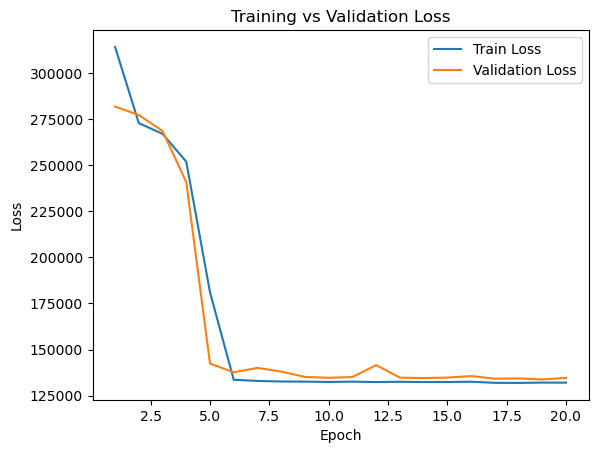

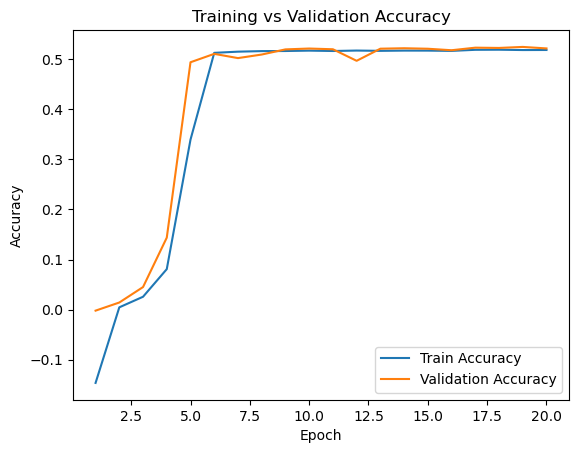

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_mse_loss) + 1)

# -------- LOSS GRAPH --------
plt.figure()
plt.plot(epochs, train_mse_loss)
plt.plot(epochs, val_mse_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend(["Train Loss", "Validation Loss"])
plt.show()

# -------- ACCURACY GRAPH --------
plt.figure()
plt.plot(epochs, train_acc_his)
plt.plot(epochs, val_acc_his)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend(["Train Accuracy", "Validation Accuracy"])
plt.show()